<a href="https://colab.research.google.com/github/gauravvxv/Pilgrim-BI-Intern-Assignment/blob/main/Notebook/Pilgirm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pilgrim BI Intern Assignment**

## Overview
This notebook covers the complete data cleaning, preprocessing, and analysis on the product dataset. The goal is to prepare a clean data that can be used for business analysis and dashboard creation.

## Tools Used
- Python
- Pandas
- Matplotlib & Seaborn

## Dataset Description
The dataset contain infomation such as name, description, brand, category, mrp_price, currency, stock, ean, color, availability, internal_id, qty, and selling_price.

## 1. Import Libraries

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dataset

In [240]:
url = "https://raw.githubusercontent.com/gauravvxv/Pilgrim-BI-Intern-Assignment/main/Dataset/products.csv"
df = pd.read_csv(url)

## 3. Data Overview

In [241]:
# Data view
df.head()

,Index,Name,Description,Brand,Category,MRP_Price,Currency,Stock,EAN,Color,Availability,Internal ID,Qty,Selling_price
0,1,Smart Fan Iron Cooker Go Wireless Portable,Catch enough role nearly.,Herman Ltd,Kids' Clothing,585.0,INR,194.0,3.968600e+12,Cornsilk,limited_stock,54,548.0,345.15
1,2,Fan,All movement yeah tax me.,"Braun, King and Rollins",Grooming Tools,992.0,INR,724.0,1.911270e+11,Bisque,discontinued,49,228.0,585.28
2,3,Smart Speakerphone Charger Eco Plus Clean,Quickly inside pull line lay start.,Peck-Coleman,Fishing & Hunting,940.0,INR,769.0,7.569140e+12,Blue,pre_order,42,520.0,601.60
3,4,Premium Grill Trimmer Portable,Lawyer one than fire.,Hines Ltd,Skincare,324.0,INR,93.0,2.705140e+12,Ivory,out_of_stock,93,251.0,178.20
4,5,Keyboard Freezer,Remain Congress blood plan voice.,"Spence, Webster and Orr",Laptops & Computers,908.0,INR,614.0,9.830390e+12,FloralWhite,discontinued,91,602.0,572.04


In [242]:
# Data shape
df.shape

(10000, 14)

In [243]:
# Column names
df.columns

Index(['Index', 'Name', 'Description', 'Brand', 'Category', 'MRP_Price',
       'Currency', 'Stock', 'EAN', 'Color', 'Availability', 'Internal ID',
       'Qty', 'Selling_price'],
      dtype='object')

In [244]:
# Column datatypes
df.dtypes

,0
Index,int64
Name,object
Description,object
Brand,object
Category,object
MRP_Price,float64
Currency,object
Stock,float64
EAN,float64
Color,object


##4. Data Understanding

In [245]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Name           10000 non-null  object 
 2   Description    10000 non-null  object 
 3   Brand          10000 non-null  object 
 4   Category       10000 non-null  object 
 5   MRP_Price      9997 non-null   float64
 6   Currency       10000 non-null  object 
 7   Stock          9978 non-null   float64
 8   EAN            10000 non-null  float64
 9   Color          10000 non-null  object 
 10  Availability   10000 non-null  object 
 11  Internal ID    10000 non-null  int64  
 12  Qty            9991 non-null   float64
 13  Selling_price  9985 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [246]:
# Data summary of numerical columns
df.describe()

,Index,MRP_Price,Stock,EAN,Internal ID,Qty,Selling_price
count,10000.00000,9997.000000,9978.00000,1.000000e+04,10000.000000,9991.000000,9985.000000
mean,5000.50000,503.327498,499.14071,5.035709e+12,50.475500,523.699830,365.369594
std,2886.89568,289.746061,288.02384,2.887653e+12,28.555993,276.426889,224.233871
min,1.00000,1.000000,1.00000,2.612759e+08,1.000000,50.000000,0.500000
25%,2500.75000,251.000000,249.00000,2.545170e+12,26.000000,281.500000,177.030000
50%,5000.50000,506.000000,500.00000,5.061905e+12,51.000000,522.000000,353.400000
75%,7500.25000,756.000000,751.00000,7.541985e+12,75.000000,765.000000,529.750000
max,10000.00000,999.000000,999.00000,9.999340e+12,99.000000,1000.000000,949.050000


In [247]:
# Data summary of categorical columns
df.describe(include='object')

,Name,Description,Brand,Category,Currency,Color,Availability
count,10000,10000,10000,10000,10000,10000,10000
unique,7896,10000,9241,34,1,140,6
top,Fan,Between key father half.,Kennedy LLC,Clothing & Apparel,INR,Cornsilk,discontinued
freq,44,1,5,320,10000,101,1706


##5. Missing Values

In [248]:
# Checking missing values in each column
df.isnull().sum()

,0
Index,0
Name,0
Description,0
Brand,0
Category,0
MRP_Price,3
Currency,0
Stock,22
EAN,0
Color,0


## 6.  Data Cleaning

In [249]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [250]:
# Clean column names
df.columns  =df.columns.str.strip().str.lower().str.replace(' ', '_')

In [251]:
# Fill null values in MRP_Price column
df['mrp_price'] = df['mrp_price'].fillna(df['selling_price'])

In [252]:
# Fill null values of stock, qty, and selling_price by category
for col in ['stock','qty','selling_price']:
  df[col] = df.groupby('category')[col].transform(lambda x: x.fillna(x.median()))

In [253]:
# Convert stock and qty from float64 to int64
df['stock'] = df['stock'].astype('int64')
df['qty'] = df['qty'].astype('int64')

##7. New columns

In [254]:
df['discount'] = df['mrp_price'] - df['selling_price']

In [255]:
df['discount_percentage'] = (df['discount'] / df['mrp_price']) * 100

In [256]:
df['revenue'] = df['qty'] * df['selling_price']

In [257]:
df['stock_value'] = df['stock'] * df['selling_price']

In [258]:
# Round numeric columns to 2 decimals
numeric_cols = ['selling_price', 'discount','discount_percentage','revenue', 'stock_value']
df[numeric_cols] = df[numeric_cols].applymap(lambda x: round(x, 2))

/tmp/ipython-input-2634625490.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(lambda x: round(x, 2))


## 8. Exploratory Data Analysis (EDA)

In [259]:
# Top 5 Total products by category
df['category'].value_counts().reset_index().head(5)

,category,count
0,Clothing & Apparel,320
1,Kitchen Appliances,319
2,Home & Kitchen,316
3,Team Sports,316
4,Headphones & Earbuds,311


In [260]:
  # Top 5 Categories by Revenue and their stock_value
category_rs = df.groupby('category').agg({'revenue':'sum','stock_value':'sum'}).reset_index().sort_values('revenue',ascending=False).reset_index(drop=True).head(5)
category_melted = category_rs.melt(id_vars='category', value_vars=['revenue','stock_value'], var_name = 'Metric', value_name='Value')
category_melted

,category,Metric,Value
0,Team Sports,revenue,64333780.01
1,Clothing & Apparel,revenue,62973055.33
2,Headphones & Earbuds,revenue,61676091.44
3,Automotive,revenue,61537394.63
4,Home & Kitchen,revenue,61272582.47
5,Team Sports,stock_value,59626014.52
6,Clothing & Apparel,stock_value,65699867.63
7,Headphones & Earbuds,stock_value,60141656.90
8,Automotive,stock_value,53664285.31
9,Home & Kitchen,stock_value,57443096.60


Text(0.5, 1.0, 'Top 5 Categories by Revenue vs Stock Value')

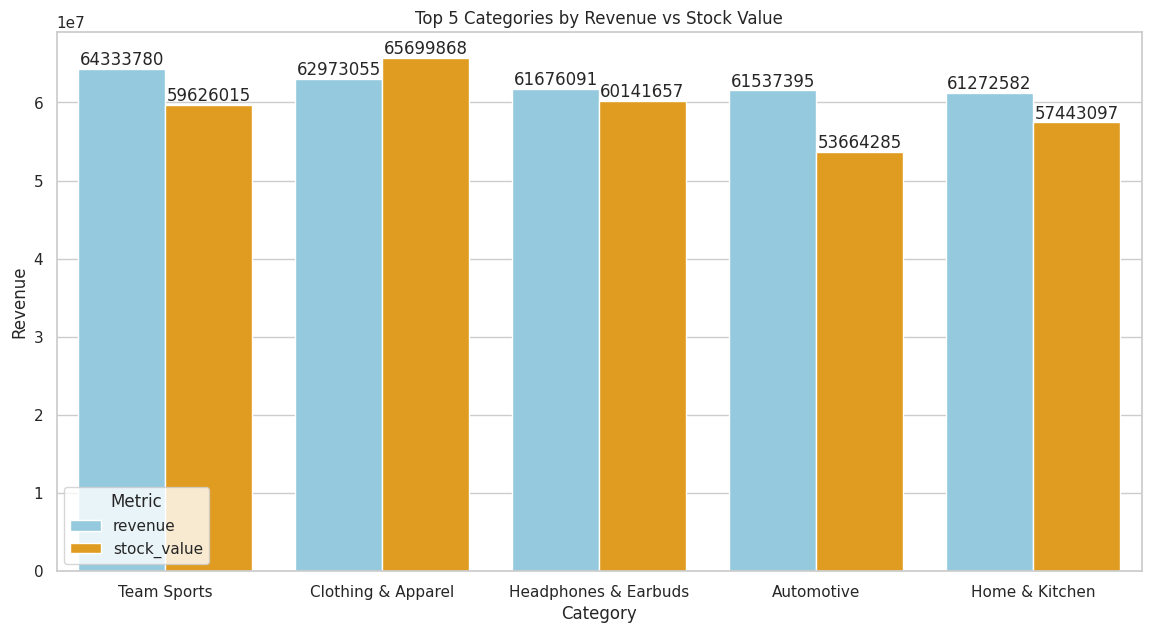

In [261]:
fig, ax = plt.subplots(figsize=(14,7))

bars = sns.barplot(x='category', y='Value', hue='Metric', data=category_melted, palette=['skyblue','orange'])

for container in bars.containers:
  ax.bar_label(container, fmt='%.0f')


ax.set_xlabel('Category')
ax.set_ylabel('Revenue')
ax.set_title('Top 5 Categories by Revenue vs Stock Value')


In [262]:
# Top 5 product name by Revenue
product_rs = df.groupby('name')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).reset_index(drop=True).head(5)
product_rs

,name,revenue
0,Fan,9304837.07
1,Dock,8476526.45
2,Lock,5856248.35
3,Freezer,5447515.58
4,Brush,5370382.66


Text(0.5, 1.0, 'Top 5 Product by Revenue')

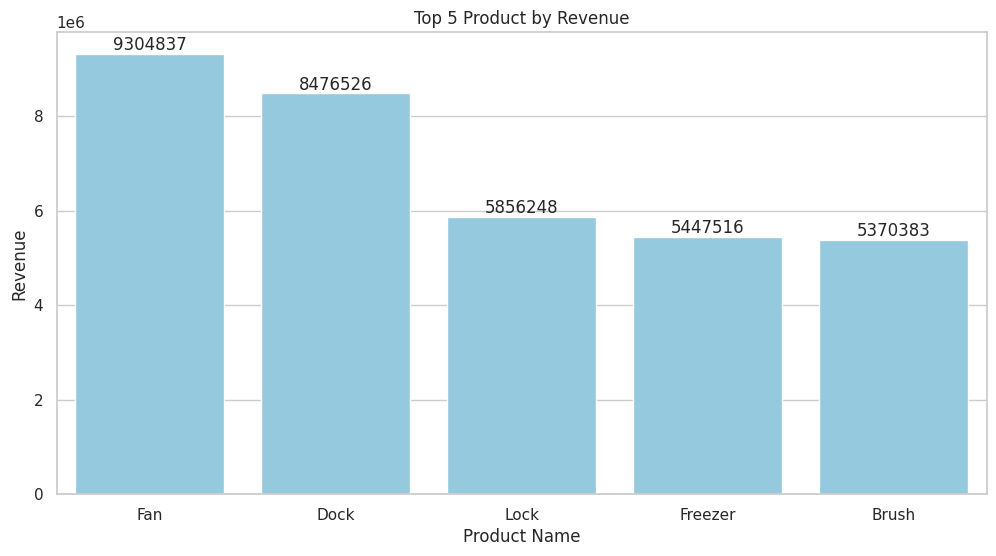

In [263]:
fig, ax = plt.subplots(figsize=(12,6))

bars = sns.barplot(x='name', y='revenue', data=product_rs, color='skyblue')

ax.bar_label(bars.containers[0], fmt='%.0f')

ax.set_xlabel('Product Name')
ax.set_ylabel('Revenue')
ax.set_title('Top 5 Product by Revenue')


In [264]:
# Top 5 Brands by Revenue
top_brand = df.groupby('brand')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).reset_index(drop=True).head(5)
top_brand

,brand,revenue
0,Fuentes LLC,1540674.29
1,Hamilton and Sons,1446256.86
2,Mercer and Sons,1386407.41
3,Cantrell PLC,1317603.42
4,Kennedy LLC,1314227.03


Text(0.5, 1.0, 'Top 5 Brand by Revenue')

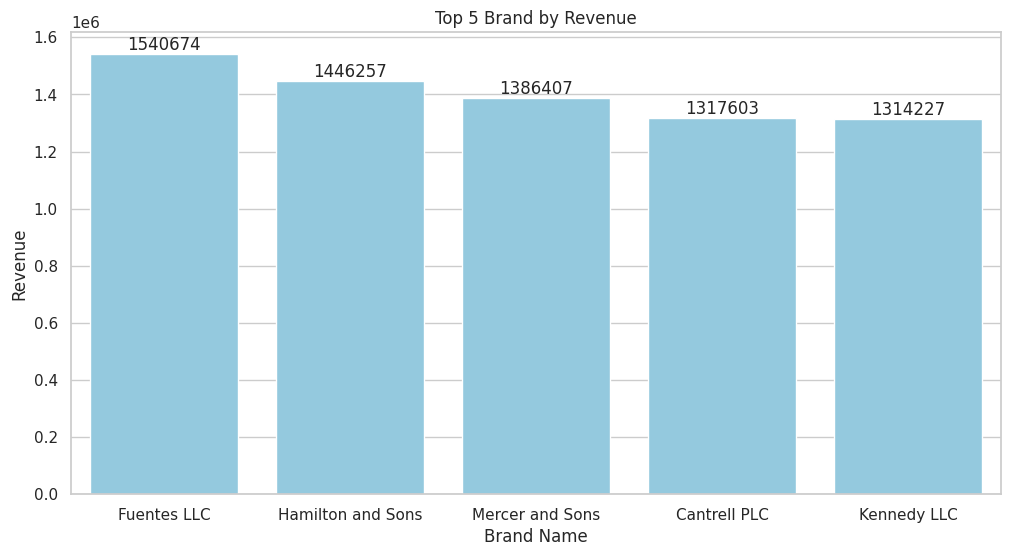

In [265]:
fig, ax = plt.subplots(figsize=(12,6))

bars = sns.barplot(x='brand', y='revenue', data=top_brand, color='skyblue')

ax.bar_label(bars.containers[0], fmt='%.0f')

ax.set_xlabel('Brand Name')
ax.set_ylabel('Revenue')
ax.set_title('Top 5 Brand by Revenue')


In [266]:
#Top 5 Brands with the highest average discount rate
brand_discount = df.groupby('brand')['discount_percentage'].mean().reset_index().sort_values('discount_percentage',ascending=False).reset_index(drop=True).head(5)
brand_discount

,brand,discount_percentage
0,"Eaton, Espinoza and Casey",61.66
1,"Cox, Nguyen and Valencia",57.79
2,Perkins-Hull,56.06
3,Green-Burns,50.57
4,Cisneros Ltd,50.00


Text(0.5, 1.0, 'Top 5 Brand by Discount Percentage')

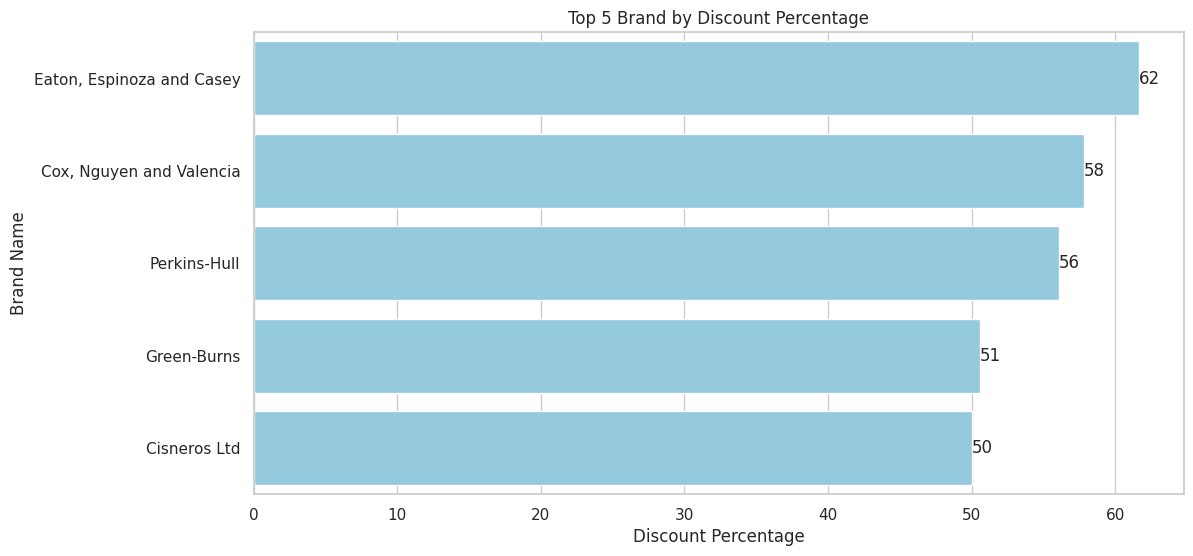

In [267]:
fig, ax = plt.subplots(figsize=(12,6))

bars = sns.barplot(x='discount_percentage', y='brand', data=brand_discount, color='skyblue')

ax.bar_label(bars.containers[0], fmt='%.0f')

ax.set_xlabel('Discount Percentage')
ax.set_ylabel('Brand Name')
ax.set_title('Top 5 Brand by Discount Percentage')


In [268]:
# Count of products by availability
availibility_count = df['availability'].value_counts().reset_index()
availibility_count

,availability,count
0,discontinued,1706
1,out_of_stock,1700
2,pre_order,1673
3,limited_stock,1644
4,in_stock,1644
5,backorder,1633


Text(0.5, 1.0, 'Product Availability')

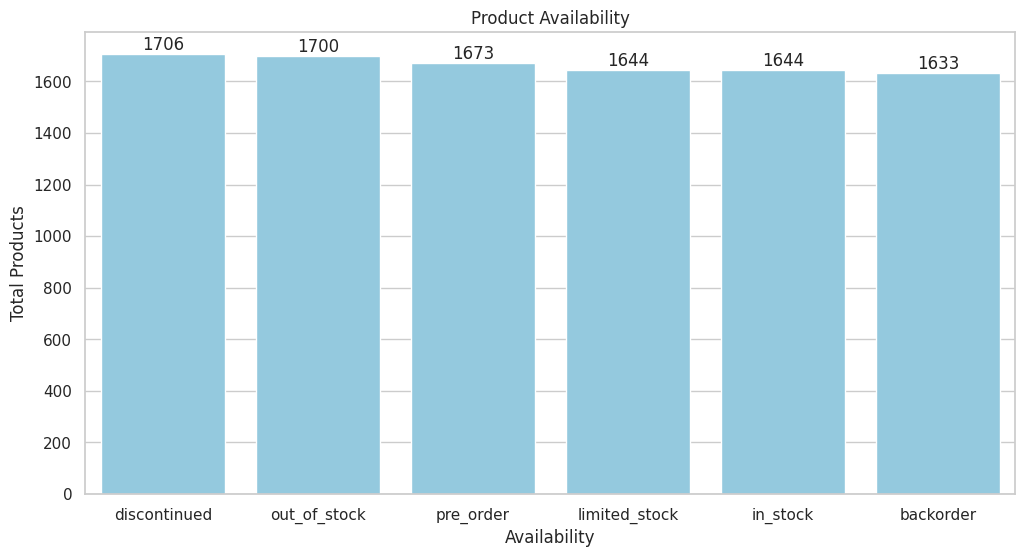

In [269]:
fig, ax = plt.subplots(figsize=(12,6))

bars = sns.barplot(x='availability', y='count', data=availibility_count, color='skyblue')

ax.bar_label(bars.containers[0], fmt='%.0f')

ax.set_xlabel('Availability')
ax.set_ylabel('Total Products')
ax.set_title('Product Availability')


Text(0.5, 1.0, 'Selling Price Distribution')

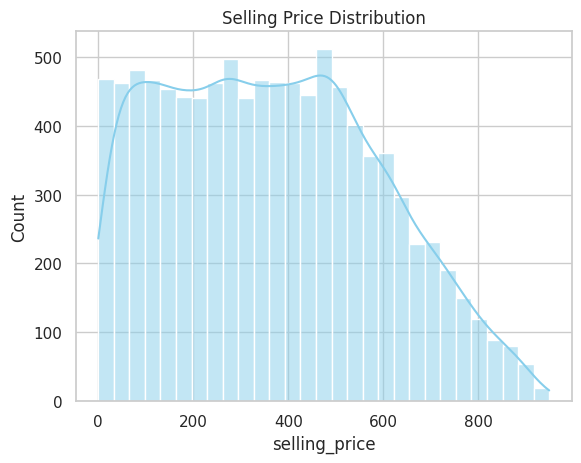

In [270]:
sns.histplot(data = df, x = 'selling_price', kde = True, color = 'skyblue')
plt.title('Selling Price Distribution')

Text(0.5, 1.0, 'MRP Price Distribution')

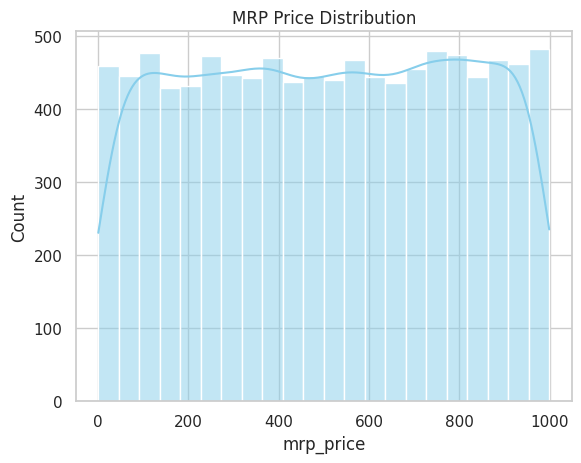

In [271]:
sns.histplot(data = df, x = 'mrp_price', kde = True, color = 'skyblue')
plt.title('MRP Price Distribution')

## 9. Clean Dataset

In [272]:
df.to_csv('clean_data.csv',index = False)

## 10. Summary of Data

- Dataset contains products from different categories and brands with stock, qty sold, selling price, MRP, revenue and discounts.  
- Missing values in `stock`, `qty`, and `selling_price` were filled using median of their category, and `mrp_price` missing values were filled same as `selling_price` because MRP should be more than selling price as per business rule.  
- We also created new columns like `discount`, `discount_percentage`, `revenue` and `stock_value` for analysis.  

- Average values: MRP is 503, Stock is 499, Quantity Sold is 523, Selling Price is 365.  
- `selling_price` is right-skewed, which means most products are low to mid-priced, while `mrp_price` is roughly normal.  

- Categorical insights:  
  - Most products are in **Clothing & Apparel (320), Kitchen Appliances (319) and Home & Kitchen (316)**.  
  - Top revenue categories are **Team Sports (64.3M revenue, stock value 59.6M), Clothing & Apparel (63M revenue, stock value 65M), Headphones & Earbuds (61.7M revenue, stock value 60M)**.  
  - Top brands are giving most revenue like **Fuentes LLC 15L**, **Hamilton and Sons 14L**.  
  - Some brands have high average discount rate `50 to 62%` and usually it leads to more quantity sold.    
  - Product availability is like: discontinued 1,706, out-of-stock 1,700, pre-order 1,673, limited stock 1,644, in-stock 1,644, backorder 1,633.  

- Overall, dataset is cleaned, preprocessed and ready for **Looker Studio dashboard**.
